In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# Importing Data with Features 
data_hedonic = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Hedonic_Final.csv')
data_utilitarian = pd.read_csv ('/Users/paulahofmann/Documents/Coding/Online-Review/FeaturePreperation/Data_with_Features/Final Data/Utilitarian_Final.csv')

In [3]:
# Combining data in one dataframe
data= pd.concat([data_hedonic, data_utilitarian])

data_helpful = data[data['helpful_vote'] != 0]


# 2. Product Description

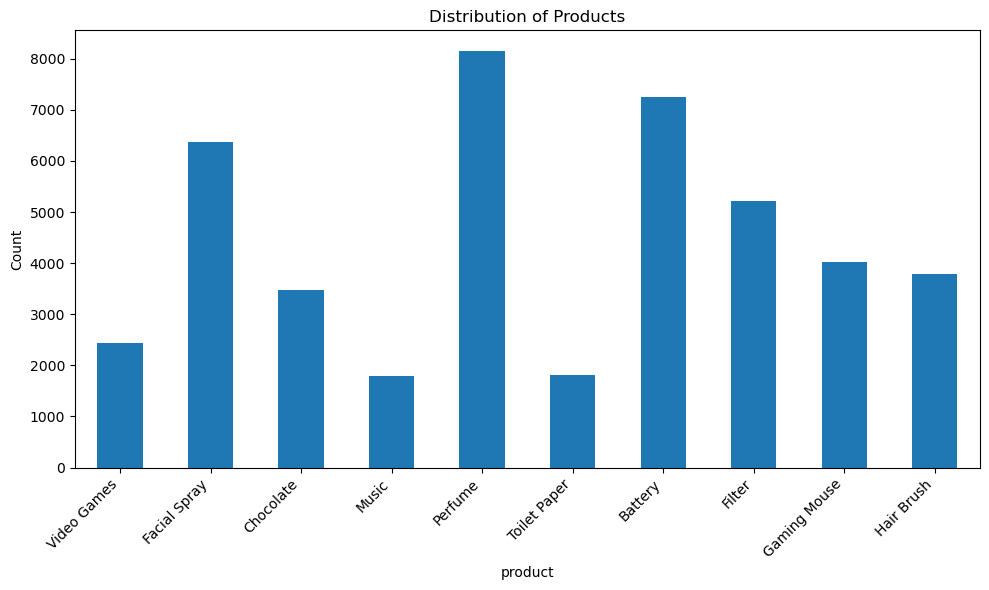

In [4]:
# Get the unique products
unique_products = data['product'].unique()

# Count the number of reviews for each product
product_counts = data['product'].value_counts().reindex(unique_products, fill_value=0)

plt.figure(figsize=(10, 6))
product_counts.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


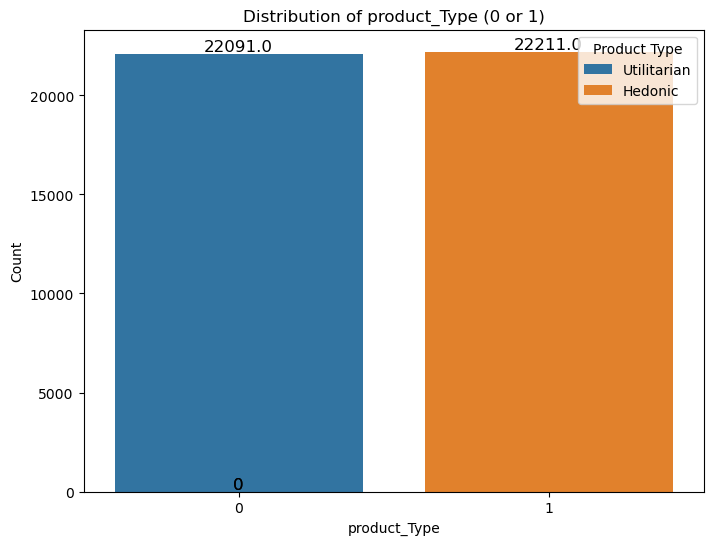

In [5]:
# Giving overview over the distribution of the product types 
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='prod_type', hue='prod_type')
plt.title('Distribution of product_Type (0 or 1)')
plt.xlabel('product_Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['0', '1'])

# Adding labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                        textcoords='offset points')

plt.legend(title='Product Type', labels=['Utilitarian', 'Hedonic'])
plt.show()

In [7]:
# Function Building for analyzing the Helpful Review by product type
def plot_votes_by_product_type(data):
    # Get unique product types
    product_types = data['product'].unique()

    # Initialize lists to store counts
    not_helpful_votes_counts = []
    helpful_votes_counts = []

    # Calculate counts for each product type
    for product_type in product_types:
        # Count of rows where Helpful Review are zero for the current product type
        not_helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)

        # Count of rows where Helpful Review are greater than zero for the current product type
        helpful_votes_count = data[(data['product'] == product_type) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Product': product_types,
        'Unhelpful Review': not_helpful_votes_counts,
        'Helpful Review': helpful_votes_counts
    })

    # Melt the DataFrame for seaborn
    plot_data = plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')

    # Create a stacked bar chart using seaborn
    plt.figure(figsize=(12, 6), dpi=800)
    ax = sns.barplot(x='Product', y='Count', hue='Vote Type', data=plot_data,edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

    for i in ax.containers:
         ax.bar_label(i,)

    plt.xlabel('Product')
    plt.ylabel('Count')
    plt.title('Distribution of helpful reviews across product categories')
    plt.legend(title='Vote Type')

    # Display the plot
    plt.show()

In [65]:
#Function for calculating the review counts by product type/Helpful Review 
def calculate_review_counts(data, category_column='product'):
    # Get unique categories
    categories = data[category_column].unique()

    # Initialize lists to store counts and categories
    categories_list = []
    not_helpful_votes_counts = []
    helpful_votes_counts = []
    total_reviews_counts = []

    # Calculate counts for each category
    for category in categories:
        # Check if the category exists in the DataFrame
        if category not in data[category_column].values:
            print(f"Category '{category}' not found in the DataFrame.")
            continue
        
        # Count of rows where Helpful Review are zero for the current category
        not_helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] == 0)].shape[0]
        not_helpful_votes_counts.append(not_helpful_votes_count)
        
        # Count of rows where Helpful Review are greater than zero for the current category
        helpful_votes_count = data[(data[category_column] == category) & (data['helpful_vote'] > 0)].shape[0]
        helpful_votes_counts.append(helpful_votes_count)
        
        # Append category to the list for DataFrame creation
        categories_list.append(category)

        # Total number of reviews for the current category
        total_reviews_count = not_helpful_votes_count + helpful_votes_count
        total_reviews_counts.append(total_reviews_count)

    # Calculate percentage of Helpful Review
    total_votes_counts = [not_h + h for not_h, h in zip(not_helpful_votes_counts, helpful_votes_counts)]
    helpful_vote_percentages = [(h / total) * 100 if total != 0 else 0 for h, total in zip(helpful_votes_counts, total_votes_counts)]

    # Calculate percentage of Unhelpful Review
    unhelpful_vote_percentages = [(not_h / total) * 100 if total != 0 else 0 for not_h, total in zip(not_helpful_votes_counts, total_reviews_counts)]
    # Create DataFrame to store counts with categories
    counts_df = pd.DataFrame({
        category_column.capitalize(): categories_list,
        'Unhelpful Reviews': not_helpful_votes_counts,
        'Helpful Reviews': helpful_votes_counts,
        'Total Reviews': total_reviews_counts,
        'Helpful Review Ratio': helpful_vote_percentages,
        'Unhelpful Review Ratio': unhelpful_vote_percentages
    })

    # Display the DataFrame
    return(counts_df)


## 2. Helpfulness Analysis

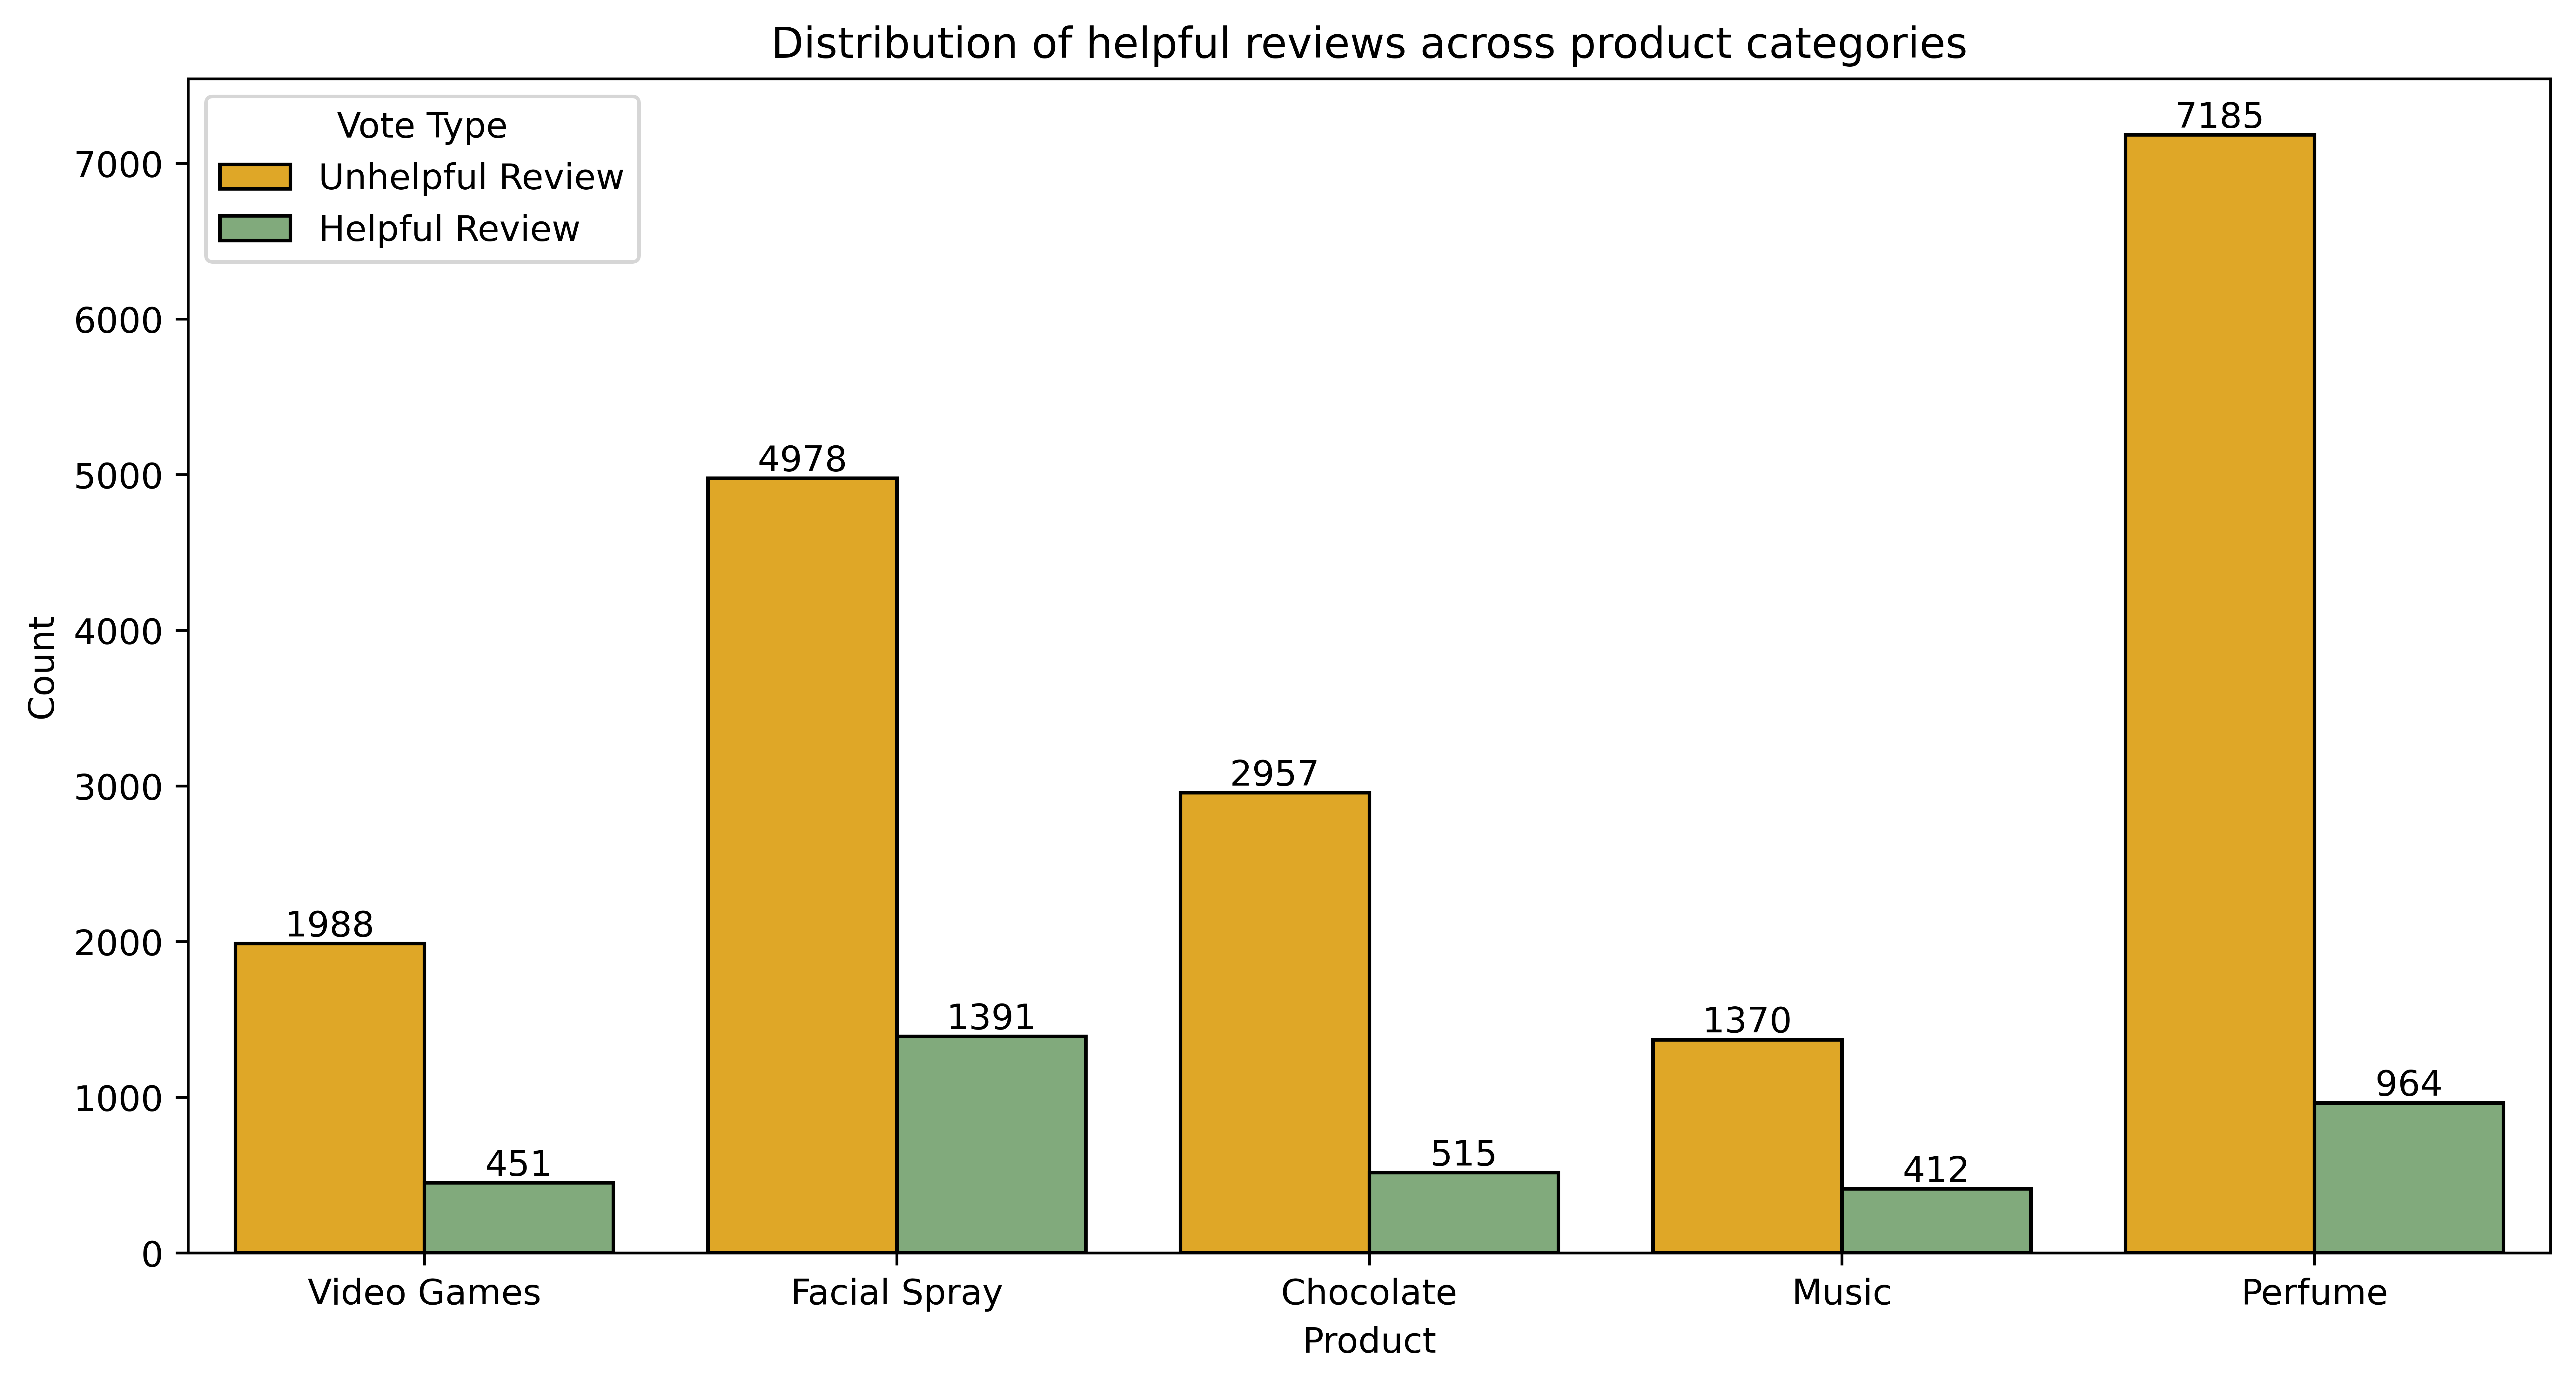

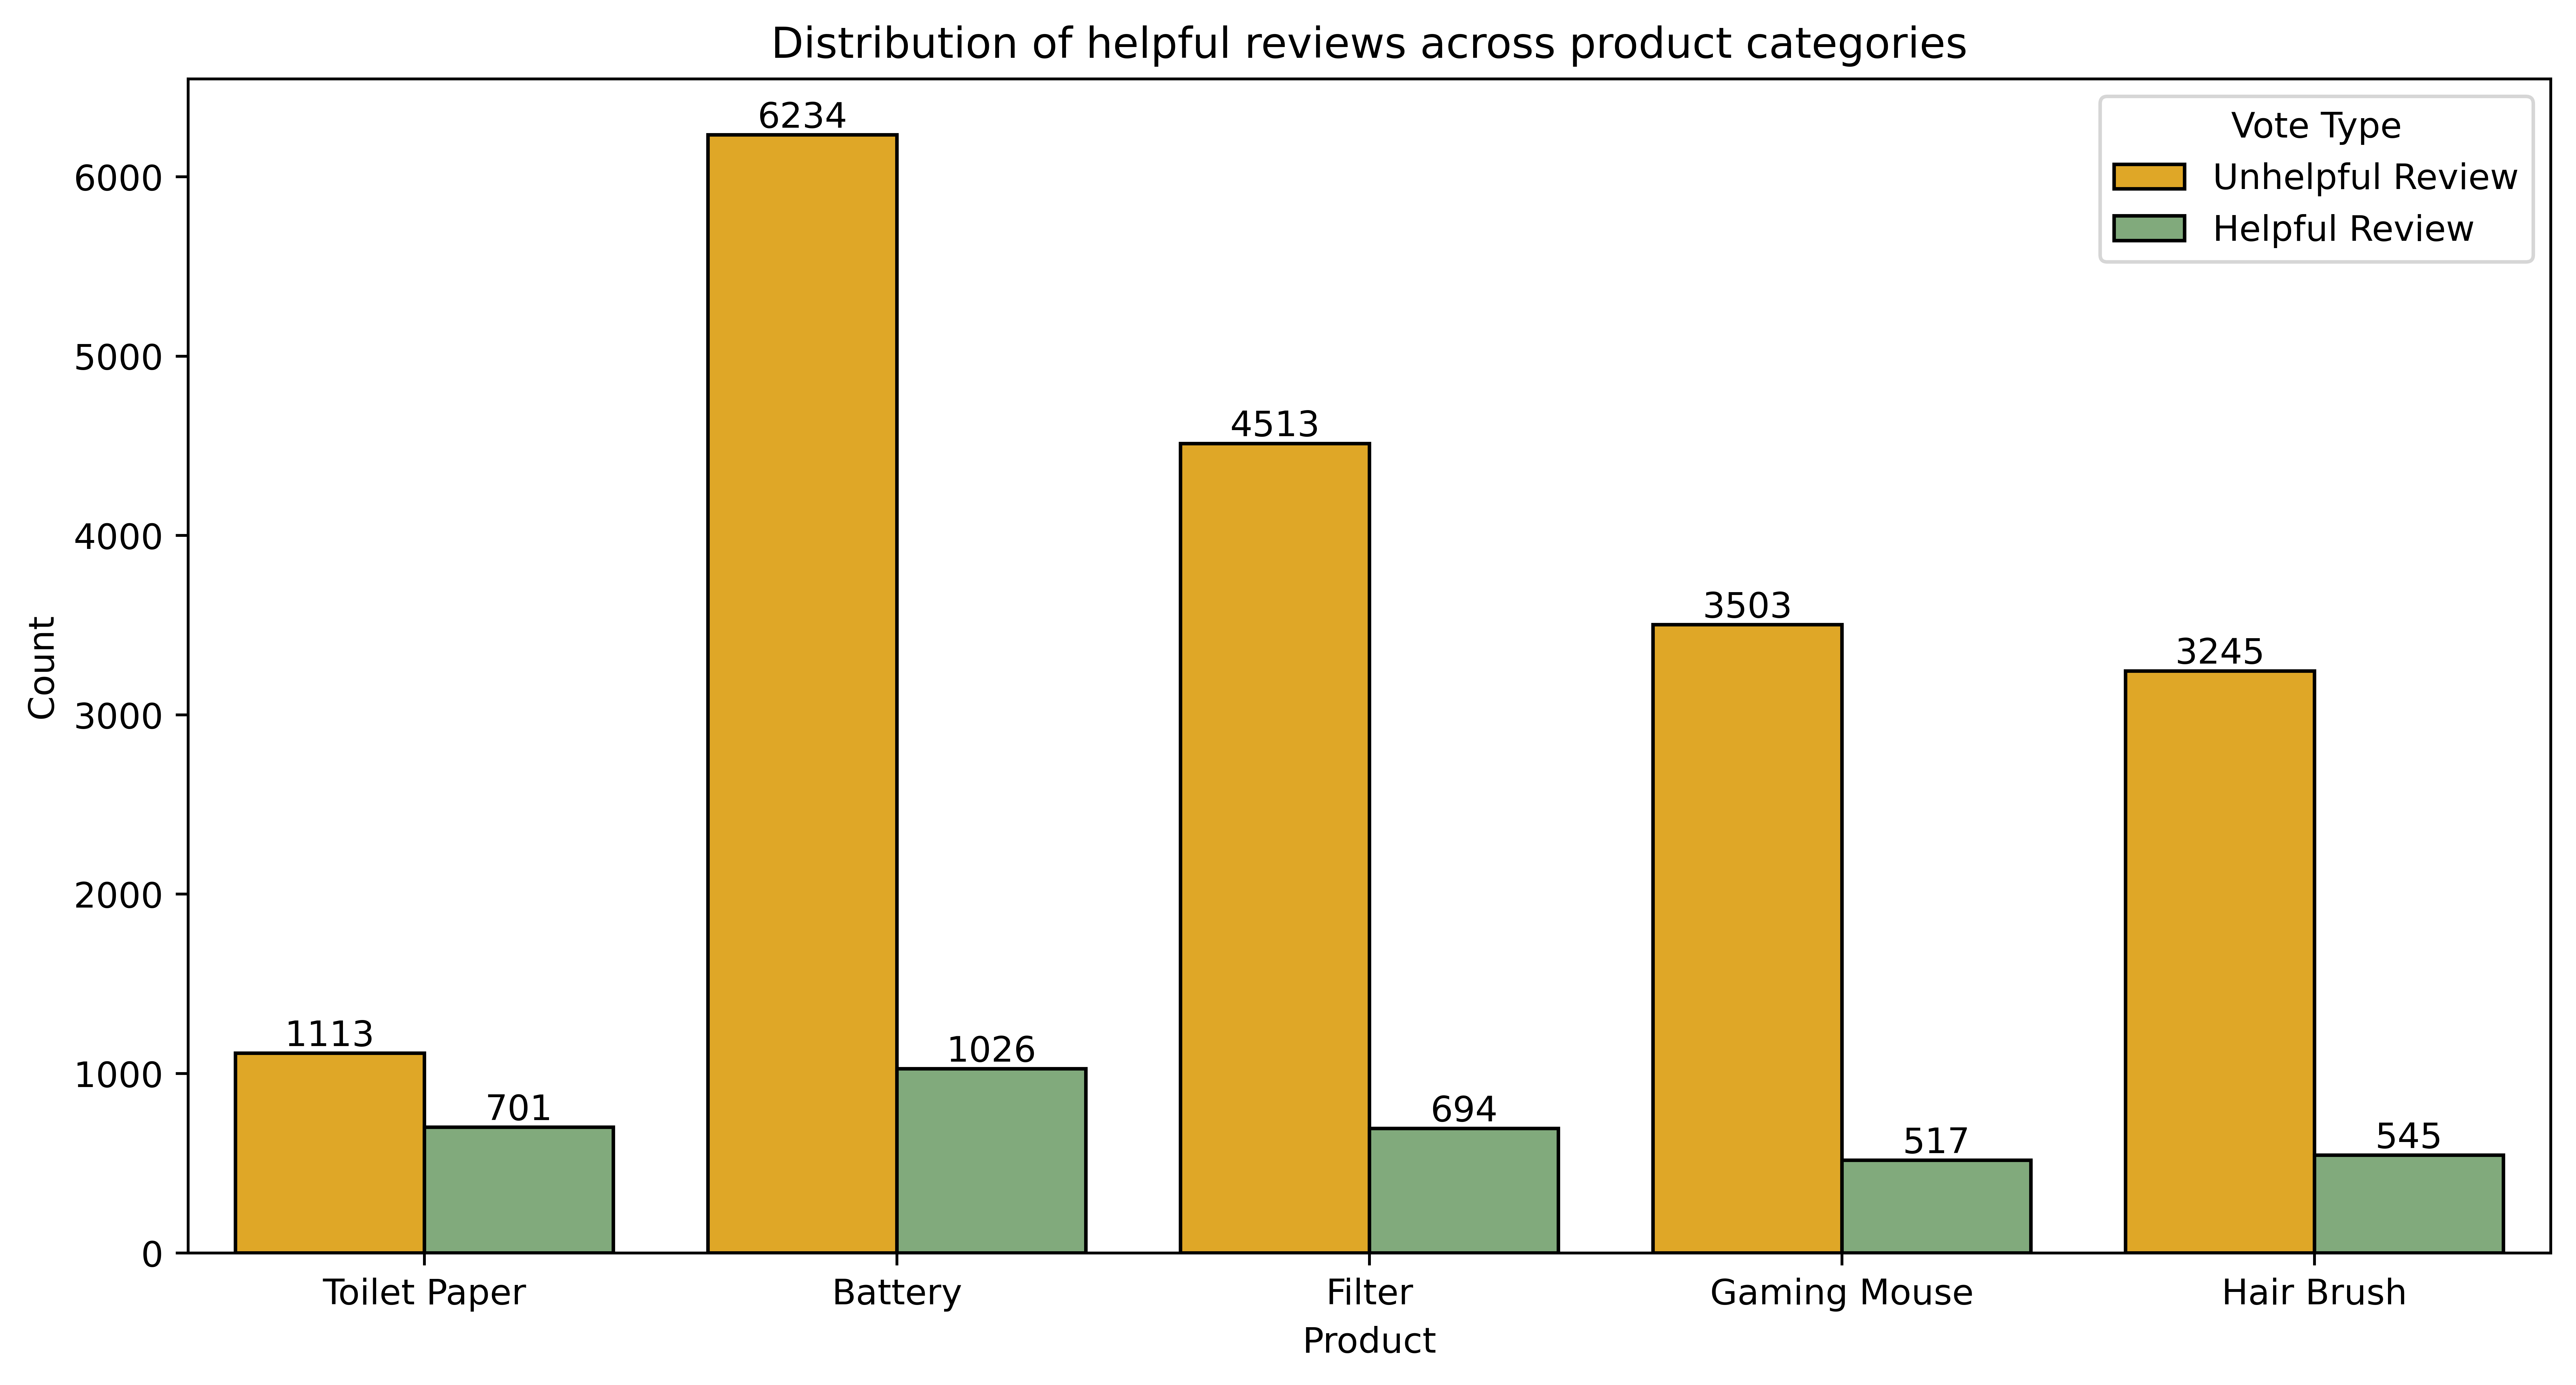

In [61]:
plot_votes_by_product_type (data_hedonic)
plot_votes_by_product_type (data_utilitarian)

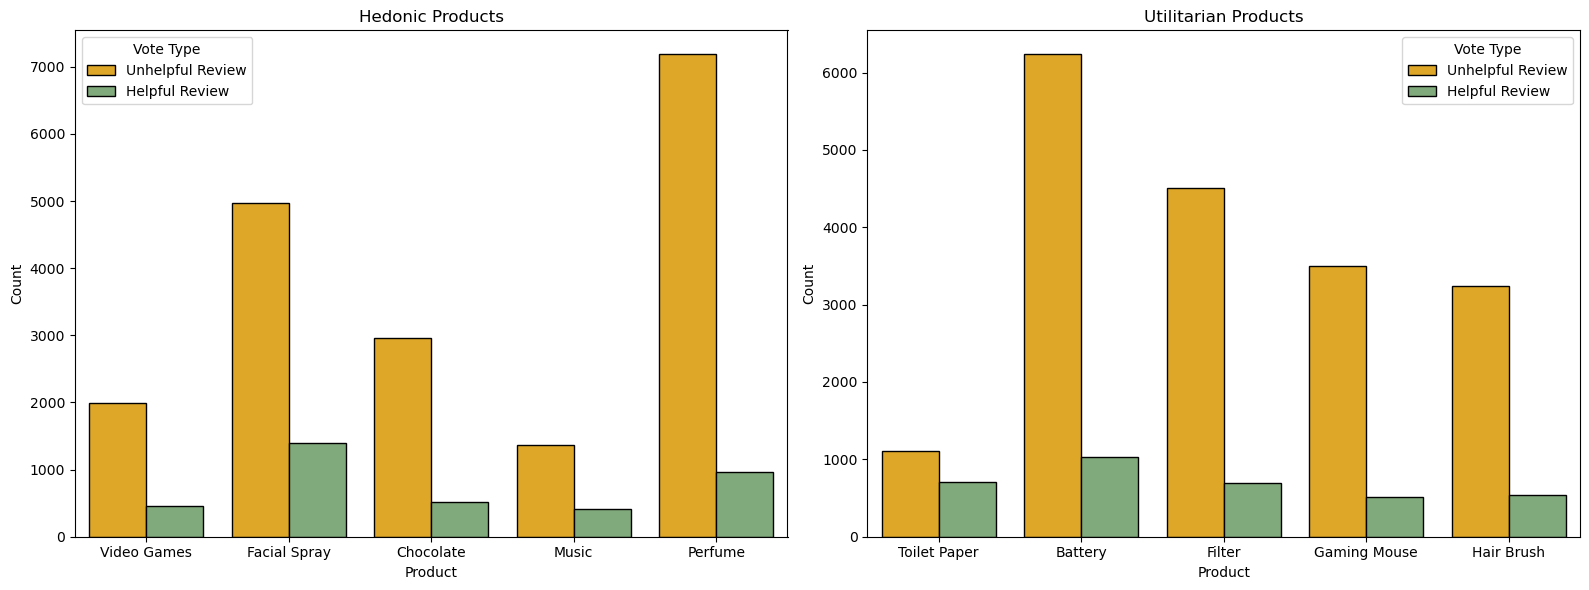

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get unique product types for hedonic and utilitarian data
hedonic_product_types = data_hedonic['product'].unique()
utilitarian_product_types = data_utilitarian['product'].unique()

# Initialize lists to store counts for hedonic and utilitarian data
hedonic_not_helpful_votes_counts = []
hedonic_helpful_votes_counts = []
utilitarian_not_helpful_votes_counts = []
utilitarian_helpful_votes_counts = []

# Calculate counts for each product type for hedonic data
for product_type in hedonic_product_types:
    # Count of rows where Helpful Review are zero for the current product type
    not_helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] == 0)].shape[0]
    hedonic_not_helpful_votes_counts.append(not_helpful_votes_count)

    # Count of rows where Helpful Review are greater than zero for the current product type
    helpful_votes_count = data_hedonic[(data_hedonic['product'] == product_type) & (data_hedonic['helpful_vote'] > 0)].shape[0]
    hedonic_helpful_votes_counts.append(helpful_votes_count)

# Calculate counts for each product type for utilitarian data
for product_type in utilitarian_product_types:
    # Count of rows where Helpful Review are zero for the current product type
    not_helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] == 0)].shape[0]
    utilitarian_not_helpful_votes_counts.append(not_helpful_votes_count)

    # Count of rows where Helpful Review are greater than zero for the current product type
    helpful_votes_count = data_utilitarian[(data_utilitarian['product'] == product_type) & (data_utilitarian['helpful_vote'] > 0)].shape[0]
    utilitarian_helpful_votes_counts.append(helpful_votes_count)

# Create DataFrames for plotting for hedonic and utilitarian data
hedonic_plot_data = pd.DataFrame({
    'Product': hedonic_product_types,
    'Unhelpful Review': hedonic_not_helpful_votes_counts,
    'Helpful Review': hedonic_helpful_votes_counts
})

utilitarian_plot_data = pd.DataFrame({
    'Product': utilitarian_product_types,
    'Unhelpful Review': utilitarian_not_helpful_votes_counts,
    'Helpful Review': utilitarian_helpful_votes_counts
})

# Melt the DataFrames for seaborn for hedonic and utilitarian data
hedonic_plot_data = hedonic_plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')
utilitarian_plot_data = utilitarian_plot_data.melt(id_vars='Product', var_name='Vote Type', value_name='Count')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Create stacked bar charts using seaborn for hedonic and utilitarian data
sns.barplot(x='Product', y='Count', hue='Vote Type', data=hedonic_plot_data, ax=axes[0], edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})
sns.barplot(x='Product', y='Count', hue='Vote Type', data=utilitarian_plot_data, ax=axes[1], edgecolor="black", palette={'Unhelpful Review': sns.xkcd_rgb['amber'], 'Helpful Review': sns.xkcd_rgb['faded green']})

# Set titles and labels for subplots
axes[0].set_title('Hedonic Products')
axes[1].set_title('Utilitarian Products')
for ax in axes:
    ax.set_xlabel('Product')
    ax.set_ylabel('Count')
    ax.legend(title='Vote Type')

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()


## 2.1 Helpfulness Analysis Statistic

In [67]:
# Helpfulness Analysis for Hedonic Data after product 
review_counts_hed_prod = calculate_review_counts (data_hedonic, 'product')
print(review_counts_hed_prod)

#Saving to CSV
review_counts_hed_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Prod.csv', index=False)

        Product  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1988              451           2439   
1  Facial Spray               4978             1391           6369   
2     Chocolate               2957              515           3472   
3         Music               1370              412           1782   
4       Perfume               7185              964           8149   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             18.491185               81.508815  
1             21.840163               78.159837  
2             14.832949               85.167051  
3             23.120090               76.879910  
4             11.829672               88.170328  


In [69]:
# Helpfulness Analysis for Hedonic Data after Main Category
review_counts_hed_cat = calculate_review_counts (data_hedonic, 'main_category')

#Print the results
print(review_counts_hed_cat)

#Saving to CSV
review_counts_hed_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Hedonic_Review_Counts_Cat.csv', index=False)

  Main_category  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0   Video Games               1988              451           2439   
1        Beauty              12163             2355          14518   
2       Grocery               2957              515           3472   
3         Music               1370              412           1782   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             18.491185               81.508815  
1             16.221243               83.778757  
2             14.832949               85.167051  
3             23.120090               76.879910  


In [70]:
# Helpfulness Analysis for Utilitarian Data after Product Category
review_counts_uti_prod = calculate_review_counts (data_utilitarian, 'product')
print (review_counts_uti_prod)

#Saving to CSV
review_counts_uti_prod.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Prod.csv', index=False)

        Product  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0  Toilet Paper               1113              701           1814   
1       Battery               6234             1026           7260   
2        Filter               4513              694           5207   
3  Gaming Mouse               3503              517           4020   
4    Hair Brush               3245              545           3790   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             38.643881               61.356119  
1             14.132231               85.867769  
2             13.328212               86.671788  
3             12.860697               87.139303  
4             14.379947               85.620053  


In [71]:
# Helpfulness Analysis for Utilitarian Data after Main Category
review_counts_uti_cat = calculate_review_counts (data_utilitarian, 'main_category')

# print 
print (review_counts_uti_cat)

#  Saving to csv
review_counts_uti_cat.to_csv('/Users/paulahofmann/Documents/Coding/Online-Review/Data Analysis/Results/Overview/Utilitarian_Review_Counts_Cat.csv')

   Main_category  Unhelpful Reviews  Helpful Reviews  Total Reviews  \
0      Household               1113              701           1814   
1    Electronics               9737             1543          11280   
2     Appliances               4513              694           5207   
3  Personal Care               3245              545           3790   

   Helpful Review Ratio  Unhelpful Review Ratio  
0             38.643881               61.356119  
1             13.679078               86.320922  
2             13.328212               86.671788  
3             14.379947               85.620053  


## 2.2 Visualization

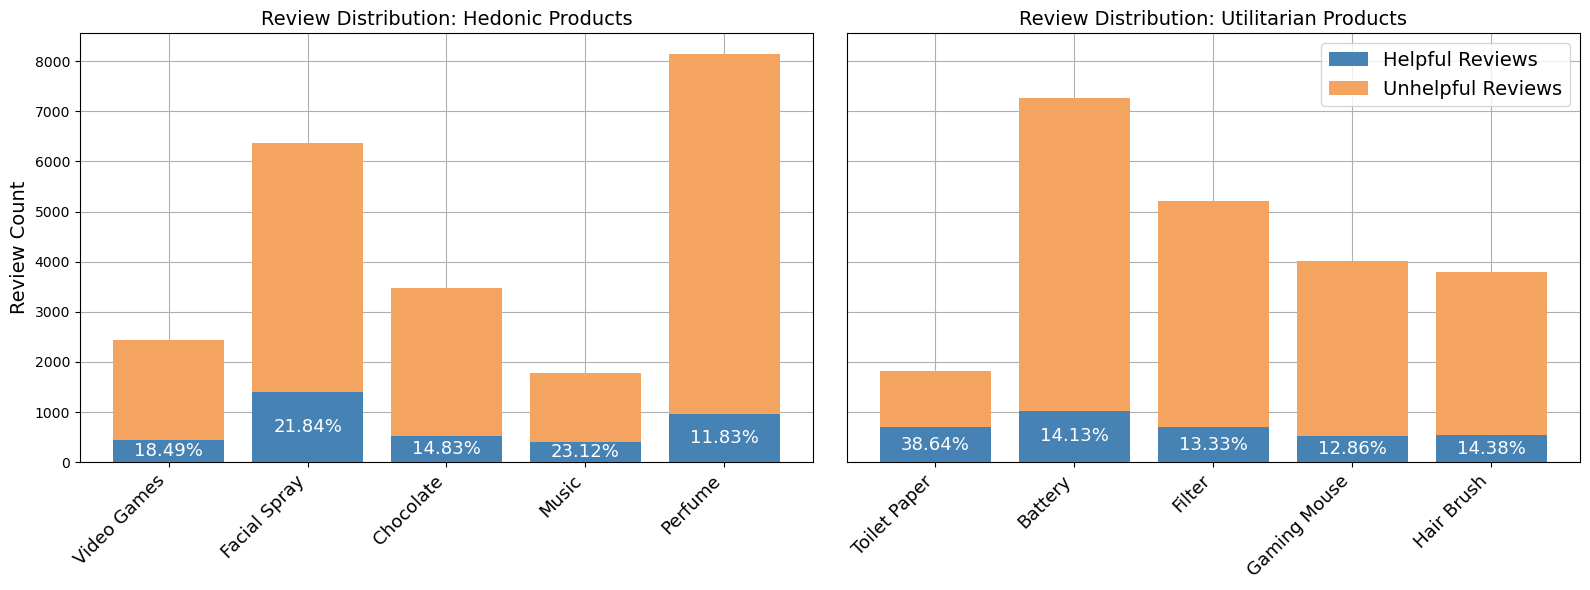

In [72]:
import matplotlib.pyplot as plt

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Set the grid to appear behind the plots
for ax in axes:
    ax.grid(True, zorder=0)

# Plot for hedonic products
axes[0].bar(range(len(review_counts_hed_prod)), review_counts_hed_prod['Helpful Reviews'], label='Helpful Reviews', color='steelblue', zorder=3)
axes[0].bar(range(len(review_counts_hed_prod)), review_counts_hed_prod['Unhelpful Reviews'], bottom=review_counts_hed_prod['Helpful Reviews'], label='Unhelpful Reviews', color='sandybrown', zorder=3)

# Add the percentage of helpful reviews inside the bars for hedonic products
for i, (helpful, unhelpful, ratio) in enumerate(zip(review_counts_hed_prod['Helpful Reviews'], review_counts_hed_prod['Unhelpful Reviews'], review_counts_hed_prod['Helpful Review Ratio'])):
    axes[0].text(i, helpful / 2, f'{ratio:.2f}%', ha='center', va='center', color='white', fontsize=13)

# Set the x-axis labels to the product names for hedonic products
axes[0].set_xticks(range(len(review_counts_hed_prod)))
axes[0].set_xticklabels(review_counts_hed_prod['Product'], rotation=45, ha='right', fontsize=13)

# Add labels and legend for hedonic products
axes[0].set_ylabel('Review Count', fontsize=14)
axes[0].set_title('Review Distribution: Hedonic Products', fontsize=14)

# Plot for utilitarian products
axes[1].bar(range(len(review_counts_uti_prod)), review_counts_uti_prod['Helpful Reviews'], label='Helpful Reviews', color='steelblue', zorder=3)
axes[1].bar(range(len(review_counts_uti_prod)), review_counts_uti_prod['Unhelpful Reviews'], bottom=review_counts_uti_prod['Helpful Reviews'], label='Unhelpful Reviews', color='sandybrown', zorder=3)

# Add the percentage of helpful reviews inside the bars for utilitarian products
for i, (helpful, unhelpful, ratio) in enumerate(zip(review_counts_uti_prod['Helpful Reviews'], review_counts_uti_prod['Unhelpful Reviews'], review_counts_uti_prod['Helpful Review Ratio'])):
    axes[1].text(i, helpful / 2, f'{ratio:.2f}%', ha='center', va='center', color='white', fontsize=13)

# Set the x-axis labels to the product names for utilitarian products
axes[1].set_xticks(range(len(review_counts_uti_prod)))
axes[1].set_xticklabels(review_counts_uti_prod['Product'], rotation=45, ha='right', fontsize=13)

# Add labels and title for utilitarian products
axes[1].set_title('Review Distribution: Utilitarian Products', fontsize=14)
axes[1].legend(fontsize=14)

# Hide the y-axis on the right plot
axes[1].tick_params(left=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [87]:
import matplotlib.pyplot as plt

# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True,dpi=800)

# Set the grid to appear behind the plots
for ax in axes:
    ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, zorder=0)

# Plot for hedonic products
hedonic_bars = axes[0].bar(range(len(review_counts_hed_prod)), review_counts_hed_prod['Helpful Reviews'], label='Helpful Reviews', color='steelblue', zorder=3, edgecolor='black')
axes[0].bar(range(len(review_counts_hed_prod)), review_counts_hed_prod['Unhelpful Reviews'], bottom=review_counts_hed_prod['Helpful Reviews'], label='Unhelpful Reviews', color='sandybrown', zorder=3, edgecolor='black')

# Add the percentage of helpful reviews inside the bars for hedonic products
for i, (helpful, unhelpful, ratio) in enumerate(zip(review_counts_hed_prod['Helpful Reviews'], review_counts_hed_prod['Unhelpful Reviews'], review_counts_hed_prod['Helpful Review Ratio'])):
    axes[0].text(i, helpful / 2, f'{ratio:.2f}%', ha='center', va='center', color='white', fontsize=14)

# Add total review count above the bars for hedonic products
for i, total in enumerate(review_counts_hed_prod['Total Reviews']):
    axes[0].text(i, total + 10, f' {total}', ha='center', va='bottom', color='black', fontsize=12)

# Set the x-axis labels to the product names for hedonic products
axes[0].set_xticks(range(len(review_counts_hed_prod)))
axes[0].set_xticklabels(review_counts_hed_prod['Product'], rotation=45, ha='right', fontsize=13)

# Add labels and legend for hedonic products
axes[0].set_ylabel('Review Count', fontsize=14)
axes[0].set_title('Review Distribution: Hedonic Products', fontsize=14)

# Plot for utilitarian products
utilitarian_bars = axes[1].bar(range(len(review_counts_uti_prod)), review_counts_uti_prod['Helpful Reviews'], label='Helpful Reviews', color='steelblue', zorder=3, edgecolor='black')
axes[1].bar(range(len(review_counts_uti_prod)), review_counts_uti_prod['Unhelpful Reviews'], bottom=review_counts_uti_prod['Helpful Reviews'], label='Unhelpful Reviews', color='sandybrown', zorder=3, edgecolor='black')

# Add the percentage of helpful reviews inside the bars for utilitarian products
for i, (helpful, unhelpful, ratio) in enumerate(zip(review_counts_uti_prod['Helpful Reviews'], review_counts_uti_prod['Unhelpful Reviews'], review_counts_uti_prod['Helpful Review Ratio'])):
    axes[1].text(i, helpful / 2, f'{ratio:.2f}%', ha='center', va='center', color='white', fontsize=14)

# Add total review count above the bars for utilitarian products
for i, total in enumerate(review_counts_uti_prod['Total Reviews']):
    axes[1].text(i, total + 10, f'{total}', ha='center', va='bottom', color='black', fontsize=12)

# Set the x-axis labels to the product names for utilitarian products
axes[1].set_xticks(range(len(review_counts_uti_prod)))
axes[1].set_xticklabels(review_counts_uti_prod['Product'], rotation=45, ha='right', fontsize=14)

# Add labels and title for utilitarian products
axes[1].set_title('Review Distribution: Utilitarian Products', fontsize=14)
axes[1].legend(fontsize=14)

# Hide the y-axis on the right plot
axes[1].tick_params(left=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

